In [1]:
load('../sim_data/toe_Lasso.RData')

In [2]:
dir = '../sim_data'
dim.list = list()
size = c(50, 100, 500, 1000)
idx = 0
for (P in size){
    for (N in size){
        idx = idx + 1
        dim.list[[idx]] = c(P=P, N=N)
    }
}

rou.list = seq(0.1, 0.9, 0.2)

files = NULL
for (rou in rou.list){
  for (dim in dim.list){
    p = dim[1]
    n = dim[2]
    files = cbind(files, paste0(dir, '/sim_toeplitz_corr', rou, paste('P', p, 'N', n, sep='_'), '.RData', sep=''))
  }
}

In [3]:
avg_FDR = NULL
for (i in 1:length(files)){
    sim_file = files[i]
    load(sim_file, dat <- new.env())
    sub = dat$sim_array[[i]]
    p = sub$p # take true values from 1st replicate of each simulated data
    coef = sub$beta
    coef.true = which(coef != 0)
    
    tt = results_toe_lasso[[i]]$Stab.table
    
    FDR = NULL
    for (r in 1:nrow(tt)){
        FDR = c(FDR, length(setdiff(which(tt[r, ] !=0), coef.true))/sum(tt[r, ]))

    }
    
    avg_FDR = c(avg_FDR, mean(FDR, na.rm=T))
}

In [4]:
table_toe = NULL
tmp_num_select = rep(0, length(results_toe_lasso))
for (i in 1:length(results_toe_lasso)){
    table_toe = rbind(table_toe, results_toe_lasso[[i]][c('n', 'p', 'rou', 'FP', 'FN', 'MSE', 'Stab')])
    tmp_num_select[i] = mean(rowSums(results_toe_lasso[[i]]$Stab.table))
    
}
table_toe = as.data.frame(table_toe)
table_toe$num_select = tmp_num_select
table_toe$FDR = round(avg_FDR,2)

In [6]:
head(table_toe)

n,p,rou,FP,FN,MSE,Stab,num_select,FDR
50,50,0.1,8.59 ( 0.46 ),0.02 ( 0.01 ),0.62 ( 0.04 ),0.36,13.57,0.51
100,50,0.1,6.3 ( 0.43 ),0 ( 0 ),0.37 ( 0.01 ),0.47,11.30,0.40
500,50,0.1,2.88 ( 0.21 ),0 ( 0 ),0.28 ( 0 ),0.73,7.88,0.20
1000,50,0.1,1.66 ( 0.11 ),0 ( 0 ),0.27 ( 0 ),0.89,6.66,0.08
50,100,0.1,11.84 ( 0.4 ),0 ( 0 ),0.67 ( 0.05 ),0.32,16.84,0.62
100,100,0.1,7.71 ( 0.56 ),0 ( 0 ),0.4 ( 0.01 ),0.44,12.71,0.46


In [7]:
# export result
result.table_toe <- apply(table_toe,2,as.character)
rownames(result.table_toe) = rownames(table_toe)
result.table_toe = as.data.frame(result.table_toe)

# extract numbers only for 'n' & 'p'
result.table_toe$n = tidyr::extract_numeric(result.table_toe$n)
result.table_toe$p = tidyr::extract_numeric(result.table_toe$p)
result.table_toe$ratio = result.table_toe$p / result.table_toe$n

result.table_toe = result.table_toe[c('n', 'p', 'rou', 'ratio', 'Stab', 'MSE', 'FP', 'FN', 'num_select', 'FDR')]
colnames(result.table_toe)[1:4] = c('N', 'P', 'Corr', 'Ratio')

extract_numeric() is deprecated: please use readr::parse_number() instead
extract_numeric() is deprecated: please use readr::parse_number() instead


In [8]:
# convert interested measurements to be numeric
result.table_toe$Stab = as.numeric(as.character(result.table_toe$Stab))
result.table_toe$MSE_mean = as.numeric(substr(result.table_toe$MSE, start=1, stop=4))
result.table_toe$FP_mean = as.numeric(substr(result.table_toe$FP, start=1, stop=4))
result.table_toe$FN_mean = as.numeric(substr(result.table_toe$FN, start=1, stop=4))
result.table_toe$FN_mean[is.na(result.table_toe$FN_mean)] = 0
result.table_toe$num_select = as.numeric(as.character(result.table_toe$num_select))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [9]:
# check whether missing values exists
result.table_toe[rowSums(is.na(result.table_toe)) > 0,]

,N,P,Corr,Ratio,Stab,MSE,FP,FN,num_select,FDR,MSE_mean,FP_mean,FN_mean
38,100,100,0.5,1,0.36,0.44 ( 0.02 ),10 ( 0.48 ),0.02 ( 0.01 ),14.98,0.56,0.44,NA,0.02


In [10]:
# recover values
result.table_toe$FP_mean[is.na(result.table_toe$FP_mean)] = 10

In [11]:
result.table_toe[38, ]

,N,P,Corr,Ratio,Stab,MSE,FP,FN,num_select,FDR,MSE_mean,FP_mean,FN_mean
38,100,100,0.5,1,0.36,0.44 ( 0.02 ),10 ( 0.48 ),0.02 ( 0.01 ),14.98,0.56,0.44,10,0.02


In [12]:
head(result.table_toe)

N,P,Corr,Ratio,Stab,MSE,FP,FN,num_select,FDR,MSE_mean,FP_mean,FN_mean
50,50,0.1,1.00,0.36,0.62 ( 0.04 ),8.59 ( 0.46 ),0.02 ( 0.01 ),13.57,0.51,0.62,8.59,0.02
100,50,0.1,0.50,0.47,0.37 ( 0.01 ),6.3 ( 0.43 ),0 ( 0 ),11.30,0.4,0.37,6.30,0.00
500,50,0.1,0.10,0.73,0.28 ( 0 ),2.88 ( 0.21 ),0 ( 0 ),7.88,0.2,0.28,2.88,0.00
1000,50,0.1,0.05,0.89,0.27 ( 0 ),1.66 ( 0.11 ),0 ( 0 ),6.66,0.08,0.27,1.66,0.00
50,100,0.1,2.00,0.32,0.67 ( 0.05 ),11.84 ( 0.4 ),0 ( 0 ),16.84,0.62,0.67,11.80,0.00
100,100,0.1,1.00,0.44,0.4 ( 0.01 ),7.71 ( 0.56 ),0 ( 0 ),12.71,0.46,0.40,7.71,0.00


In [13]:
tail(result.table_toe)

,N,P,Corr,Ratio,Stab,MSE,FP,FN,num_select,FDR,MSE_mean,FP_mean,FN_mean
75,500,500,0.9,1.0,0.25,0.3 ( 0 ),18.18 ( 0.69 ),0.03 ( 0.02 ),23.15,0.72,0.30,18.1,0.03
76,1000,500,0.9,0.5,0.33,0.28 ( 0 ),12.68 ( 0.57 ),0 ( 0 ),17.68,0.63,0.28,12.6,0.00
77,50,1000,0.9,20.0,0.08,0.9 ( 0.05 ),18.15 ( 0.34 ),3.92 ( 0.08 ),19.23,0.89,0.90,18.1,3.92
78,100,1000,0.9,10.0,0.16,0.59 ( 0.02 ),15.99 ( 0.66 ),2.88 ( 0.06 ),18.11,0.81,0.59,15.9,2.88
79,500,1000,0.9,2.0,0.20,0.31 ( 0 ),24.62 ( 1.01 ),0.05 ( 0.02 ),29.57,0.77,0.31,24.6,0.05
80,1000,1000,0.9,1.0,0.25,0.28 ( 0 ),18.51 ( 0.86 ),0 ( 0 ),23.51,0.71,0.28,18.5,0.00


In [14]:
result.table_toe

## export
write.table(result.table_toe, '../results_summary/sim_toe_lasso.txt', sep='\t', row.names=F)

N,P,Corr,Ratio,Stab,MSE,FP,FN,num_select,FDR,MSE_mean,FP_mean,FN_mean
50,50,0.1,1.00,0.36,0.62 ( 0.04 ),8.59 ( 0.46 ),0.02 ( 0.01 ),13.57,0.51,0.62,8.59,0.02
100,50,0.1,0.50,0.47,0.37 ( 0.01 ),6.3 ( 0.43 ),0 ( 0 ),11.30,0.4,0.37,6.30,0.00
500,50,0.1,0.10,0.73,0.28 ( 0 ),2.88 ( 0.21 ),0 ( 0 ),7.88,0.2,0.28,2.88,0.00
1000,50,0.1,0.05,0.89,0.27 ( 0 ),1.66 ( 0.11 ),0 ( 0 ),6.66,0.08,0.27,1.66,0.00
50,100,0.1,2.00,0.32,0.67 ( 0.05 ),11.84 ( 0.4 ),0 ( 0 ),16.84,0.62,0.67,11.80,0.00
100,100,0.1,1.00,0.44,0.4 ( 0.01 ),7.71 ( 0.56 ),0 ( 0 ),12.71,0.46,0.40,7.71,0.00
500,100,0.1,0.20,0.70,0.27 ( 0 ),3.35 ( 0.22 ),0 ( 0 ),8.35,0.23,0.27,3.35,0.00
1000,100,0.1,0.10,0.81,0.27 ( 0 ),2.29 ( 0.23 ),0 ( 0 ),7.29,0.13,0.27,2.29,0.00
50,500,0.1,10.00,0.18,1.61 ( 0.1 ),20.85 ( 0.38 ),0.69 ( 0.08 ),25.16,0.78,1.61,20.80,0.69
100,500,0.1,5.00,0.30,0.53 ( 0.02 ),14.69 ( 0.7 ),0 ( 0 ),19.69,0.66,0.53,14.60,0.00


Warning message:
“Using size for a discrete variable is not advised.”Warning message:
“Using alpha for a discrete variable is not advised.”Warning message:
“Using size for a discrete variable is not advised.”Warning message:
“Using alpha for a discrete variable is not advised.”Warning message:
“Using size for a discrete variable is not advised.”Warning message:
“Using alpha for a discrete variable is not advised.”Warning message:
“Using size for a discrete variable is not advised.”Warning message:
“Using alpha for a discrete variable is not advised.”Warning message:
“Removed 10 rows containing missing values (geom_point).”

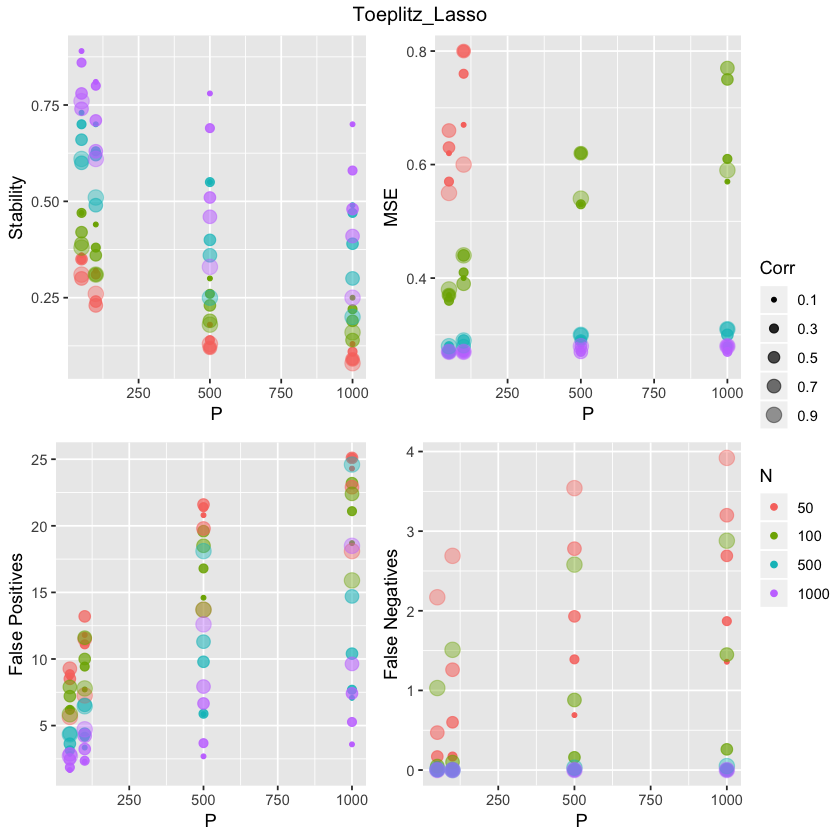

In [16]:
library(ggplot2)
library(ggpubr)
result.table_toe$N = as.factor(result.table_toe$N)
fig_toe_stab = ggplot(result.table_toe, aes(x=P, y=Stab, color=N)) + 
               geom_point(aes(size = Corr, alpha=Corr)) + theme(legend.position = "none") +
               scale_size_discrete(range = c(1,4)) + scale_alpha_discrete(range = c(1, 0.4)) + ylab('Stability')

fig_toe_mse = ggplot(result.table_toe, aes(x=P, y=MSE_mean, color=N)) + 
              geom_point(aes(size = Corr, alpha=Corr)) + theme(legend.position="none") +
              scale_size_discrete(range = c(1,4)) + scale_alpha_discrete(range = c(1, 0.4)) + ylab('MSE')

fig_toe_fp = ggplot(result.table_toe, aes(x=P, y=FP_mean, color=N)) + 
             geom_point(aes(size = Corr, alpha=Corr)) + theme(legend.position = "none") + 
             scale_size_discrete(range = c(1,4)) + scale_alpha_discrete(range = c(1, 0.4)) + ylab('False Positives')

fig_toe_fn = ggplot(result.table_toe, aes(x=P, y=FN_mean, color=N)) + 
             geom_point(aes(size = Corr, alpha=Corr)) + theme(legend.position = "none") +
             scale_size_discrete(range = c(1,4)) + scale_alpha_discrete(range = c(1, 0.4)) + ylab('False Negatives')
fig = ggarrange(fig_toe_stab, fig_toe_mse, fig_toe_fp, fig_toe_fn, ncol=2, nrow=2, 
          common.legend = TRUE, legend="right") 
fig = annotate_figure(fig, top = text_grob("Toeplitz_Lasso"))
ggexport(fig, filename = "../figures_sim/figure_toe_lasso.pdf", height=6, width=6)

In [12]:
result.table_toe[with(result.table_toe, order(N, P, Corr)),]

,N,P,Corr,Ratio,Stab,MSE,FP,FN,num_select,MSE_mean,FP_mean,FN_mean
1,50,50,0.1,1.0,0.36,0.62 ( 0.04 ),8.59 ( 0.46 ),0.02 ( 0.01 ),13.57,0.62,8.59,0.02
17,50,50,0.3,1.0,0.35,0.57 ( 0.03 ),8.86 ( 0.42 ),0.05 ( 0.02 ),13.81,0.57,8.86,0.05
33,50,50,0.5,1.0,0.35,0.63 ( 0.04 ),8.51 ( 0.41 ),0.17 ( 0.04 ),13.34,0.63,8.51,0.17
49,50,50,0.7,1.0,0.30,0.66 ( 0.04 ),9.27 ( 0.39 ),0.47 ( 0.06 ),13.80,0.66,9.27,0.47
65,50,50,0.9,1.0,0.31,0.55 ( 0.03 ),5.65 ( 0.29 ),2.17 ( 0.13 ),8.48,0.55,5.65,2.17
5,50,100,0.1,2.0,0.32,0.67 ( 0.05 ),11.84 ( 0.4 ),0 ( 0 ),16.84,0.67,11.80,0.00
21,50,100,0.3,2.0,0.31,0.76 ( 0.04 ),11.12 ( 0.37 ),0.17 ( 0.04 ),15.95,0.76,11.10,0.17
37,50,100,0.5,2.0,0.24,0.8 ( 0.05 ),13.21 ( 0.46 ),0.6 ( 0.07 ),17.61,0.80,13.20,0.60
53,50,100,0.7,2.0,0.23,0.8 ( 0.04 ),11.57 ( 0.53 ),1.26 ( 0.1 ),15.31,0.80,11.50,1.26
69,50,100,0.9,2.0,0.26,0.6 ( 0.03 ),7.26 ( 0.35 ),2.69 ( 0.1 ),9.57,0.60,7.26,2.69
